In [76]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df1=pd.read_csv("/content/HotelReviews.csv")
df1.head(10)

,Name,Reviews,Category
0,Akinyi M,This is one of the oldest hotels but its has r...,Positive
1,Ahmad Mreish,"I had bad experience last year, I had a dinner...",Negative
2,\nCharles Nichols,The management of this hotel employs unethical...,Negative
3,\nJude Orazulike,Completely overrated. Lack space. No privacy f...,Negative
4,Cynthia Mumbo,"5 star beautiful place, but I was treated like...",Negative
5,Douglas M,This is a fantastic camp. Rooms are clean and ...,Positive
6,muzungu57,first class hotel in NairobiSerena Hotel offer...,Positive
7,wamuyu501,"RUDE STAFFIf you are kenyan and black, kindly ...",Negative
8,Nyawira W,walked in was to meet a business colleague an...,Negative
9,saltsy372,Stayed here for 2 nights on arrival in Nairobi...,Positive


In [74]:
# drop unused column name
df1=df1.drop(['Name'], axis=1)

In [75]:
df1.head()

,Reviews,Category
0,This is one of the oldest hotels but its has r...,Positive
1,"I had bad experience last year, I had a dinner...",Negative
2,The management of this hotel employs unethical...,Negative
3,Completely overrated. Lack space. No privacy f...,Negative
4,"5 star beautiful place, but I was treated like...",Negative


In [ ]:
# You can see there are 3 categories of Reviews
print(df1.groupby('Category').size())


Category
Negative    6
Neutral     5
Positive    9
dtype: int64


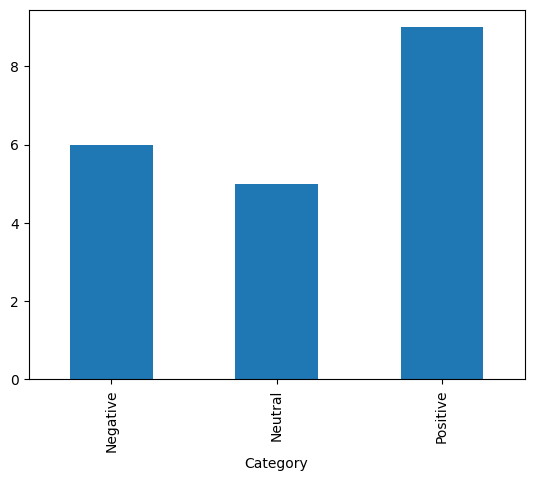

In [ ]:

# Plotting the bar chart
%matplotlib inline
df1.groupby('Category').size().plot(kind='bar');

In [ ]:
# Count vectorization of text
from sklearn.feature_extraction.text import CountVectorizer

# Hotel Review Data
corpus = df1['Reviews'].values

# Creating the vectorizer
vectorizer = CountVectorizer(stop_words='english')

# Converting the text to numeric data
X = vectorizer.fit_transform(corpus)

#print(vectorizer.get_feature_names())


In [ ]:
import pandas as pd

# X is our count vectorized data and df1 is our DataFrame containing the 'Category' column
CountVectorizedData = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
CountVectorizedData['Priority'] = df1['Category']
print(CountVectorizedData.shape)
CountVectorizedData.head()


(20, 486)


,100,15mins,2200,2300,absolutely,accessible,accommodating,adequate,adults,african,...,white,willing,window,wine,wines,world,worst,wrong,year,Priority
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Positive
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,Negative
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Negative
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Negative
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Negative


In [ ]:
import gensim
#Loading the word vectors from Google trained word2Vec model
GoogleModel = gensim.models.KeyedVectors.load_word2vec_format('/content/drive/MyDrive/GoogleNews-vectors-negative300.bin', binary=True,)

In [ ]:
# Each word is a vector of 300 numbers
GoogleModel['hello'].shape

(300,)

In [ ]:
# Looking at a sample vector for a word
GoogleModel['hello']

array([-0.05419922,  0.01708984, -0.00527954,  0.33203125, -0.25      ,
       -0.01397705, -0.15039062, -0.265625  ,  0.01647949,  0.3828125 ,
       -0.03295898, -0.09716797, -0.16308594, -0.04443359,  0.00946045,
        0.18457031,  0.03637695,  0.16601562,  0.36328125, -0.25585938,
        0.375     ,  0.171875  ,  0.21386719, -0.19921875,  0.13085938,
       -0.07275391, -0.02819824,  0.11621094,  0.15332031,  0.09082031,
        0.06787109, -0.0300293 , -0.16894531, -0.20800781, -0.03710938,
       -0.22753906,  0.26367188,  0.012146  ,  0.18359375,  0.31054688,
       -0.10791016, -0.19140625,  0.21582031,  0.13183594, -0.03515625,
        0.18554688, -0.30859375,  0.04785156, -0.10986328,  0.14355469,
       -0.43554688, -0.0378418 ,  0.10839844,  0.140625  , -0.10595703,
        0.26171875, -0.17089844,  0.39453125,  0.12597656, -0.27734375,
       -0.28125   ,  0.14746094, -0.20996094,  0.02355957,  0.18457031,
        0.00445557, -0.27929688, -0.03637695, -0.29296875,  0.19

In [ ]:
# Finding similar words
GoogleModel.most_similar('king', topn=5)

[('kings', 0.7138045430183411),
 ('queen', 0.6510956883430481),
 ('monarch', 0.6413194537162781),
 ('crown_prince', 0.6204220056533813),
 ('prince', 0.6159993410110474)]

In [ ]:
# Creating the list of words which are present in the Document term matrix
WordsVocab=CountVectorizedData.columns[:-1]

# Printing sample words
WordsVocab[0:10]

Index(['100', '15mins', '2200', '2300', 'absolutely', 'accessible',
       'accommodating', 'adequate', 'adults', 'african'],
      dtype='object')

In [ ]:
import numpy as np

# Defining a function which takes text input and returns one vector for each sentence
def FunctionText2Vec(inpTextData):
    # Converting the text to numeric data using TfidfVectorizer
    X = vectorizer.transform(inpTextData)
    CountVecData = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

    # Creating empty list to hold sentences
    sentences = []

    # Looping through each row for the data
    for i in range(CountVecData.shape[0]):

        # initiating a sentence with all zeros
        Sentence = np.zeros(300)

        # Looping through each word in the sentence and if it's present in
        # the Word2Vec model then storing its vector
        for word in WordsVocab[CountVecData.iloc[i , :]>=1]:
            #print(word)
            if word in GoogleModel.key_to_index.keys():
                Sentence = Sentence + GoogleModel[word]
        # Appending the sentence to the list
        sentences.append(Sentence)

    # Concatenating the list of sentences into a DataFrame
    W2Vec_Data = pd.concat([pd.DataFrame([sentence]) for sentence in sentences], ignore_index=True)

    return W2Vec_Data



In [ ]:
# Calling the function to convert all the text data to Word2Vec Vectors
W2Vec_Data = FunctionText2Vec(df1['Reviews'])

# Checking the new representation for sentences
W2Vec_Data.shape


(20, 300)

**Preparing Data for ML**


In [ ]:
#Adding the target variable
W2Vec_Data.reset_index(inplace=True, drop=True)
W2Vec_Data['Priority'] = CountVectorizedData['Priority']

# Assigning to DataForML variable
DataForML = W2Vec_Data
DataForML.head()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,Priority
0,-0.082001,0.439941,0.033661,0.680145,-1.187439,0.303131,0.526581,-2.545410,1.432129,1.160591,...,0.477173,-1.431091,0.949829,-0.297546,-0.217272,-0.126526,-1.136353,1.048874,-0.131836,Positive
1,-0.022690,1.294800,0.624344,3.369812,-1.446594,0.914062,0.345444,-2.005981,2.009155,1.385986,...,1.947906,-2.569458,2.534338,-0.184021,-1.474043,-0.323280,-1.041809,1.627441,1.110458,Negative
2,-0.287659,0.528931,0.150269,0.424103,-1.163757,0.842896,-0.101074,-0.815002,1.028564,-0.404663,...,2.187683,-0.179810,1.563965,0.106293,-0.056698,0.443443,0.102417,1.045647,0.601257,Negative
3,-0.096191,0.715340,-0.590332,0.843506,-1.407654,0.674835,0.452393,-0.795166,1.338928,0.796997,...,0.900879,-0.295166,-0.294224,0.128906,0.155085,0.899414,-0.641968,-0.162354,0.231201,Negative
4,0.489746,1.502441,0.741123,0.347702,-1.335326,0.339355,0.681396,-1.455994,1.246338,1.442230,...,0.588989,-0.939636,1.021194,-1.315369,-0.262817,0.040100,-0.421631,0.830883,0.267761,Negative


In [ ]:
# Separate Target Variable and Predictor Variables
TargetVariable=DataForML.columns[-1]
Predictors=DataForML.columns[:-1]

X=DataForML[Predictors].values
y=DataForML[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(16, 300)
(16,)
(4, 300)
(4,)


Training ML classification models
Now the data is ready for machine learning. There are 300-predictors and one target variable. We will use the below algorithms and select the best one out of them based on the accuracy scores you can add more algorithms to this list as per your preferences.

**Naive Bayes**

**KNN**

**Logistic Regression**

**Decision Trees**

**AdaBoost**

**Naive Bayes**

In [77]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB, MultinomialNB

# GaussianNB is used in Binomial Classification
# MultinomialNB is used in multi-class classification
#clf = GaussianNB()
clf = MultinomialNB()

# Printing all the parameters of Naive Bayes
print(clf)


# NB=clf.fit(X_train,y_train)
# prediction=NB.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
# Accuracy_Values=cross_val_score(NB, X , y, cv=5, scoring='f1_weighted')
# print('\nAccuracy values for 5-fold Cross Validation:\n',Accuracy_Values)
# print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

MultinomialNB()
              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00         1
     Neutral       0.00      0.00      0.00         1
    Positive       0.67      1.00      0.80         2

    accuracy                           0.75         4
   macro avg       0.56      0.67      0.60         4
weighted avg       0.58      0.75      0.65         4

[[1 0 0]
 [0 0 1]
 [0 0 2]]
Accuracy of the model on Testing Sample Data: 0.65


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**KNN**

In [78]:
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=15)

# Printing all the parameters of KNN
print(clf)

# Creating the model on Training Data
KNN=clf.fit(X_train,y_train)
prediction=KNN.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))


# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score


KNeighborsClassifier(n_neighbors=15)
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         1
     Neutral       0.00      0.00      0.00         1
    Positive       0.50      1.00      0.67         2

    accuracy                           0.50         4
   macro avg       0.17      0.33      0.22         4
weighted avg       0.25      0.50      0.33         4

[[0 0 1]
 [0 0 1]
 [0 0 2]]
Accuracy of the model on Testing Sample Data: 0.33


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Logistic Regression**

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
# choose parameter Penalty='l1' or C=1
# choose different values for solver 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'
clf = LogisticRegression(C=10,penalty='l2', solver='newton-cg')

# Printing all the parameters of logistic regression
# print(clf)

# Creating the model on Training Data
LOG=clf.fit(X_train,y_train)

# Generating predictions on testing data
prediction=LOG.predict(X_test)
# Printing sample values of prediction in Testing data
TestingData=pd.DataFrame(data=X_test, columns=Predictors)
TestingData['Survived']=y_test
TestingData['Predicted_Survived']=prediction
print(TestingData.head())


# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(prediction, y_test))

## Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))


          0         1         2         3         4         5         6  \
0 -0.082001  0.439941  0.033661  0.680145 -1.187439  0.303131  0.526581   
1 -0.023895  3.817757 -1.442688  2.540436 -1.097412 -0.927429  0.832148   
2  1.310959  4.535545  0.757935  4.415695 -1.318369 -1.210388  0.625671   
3 -0.022690  1.294800  0.624344  3.369812 -1.446594  0.914062  0.345444   

          7         8         9  ...       292       293       294       295  \
0 -2.545410  1.432129  1.160591  ... -1.431091  0.949829 -0.297546 -0.217272   
1 -2.026733  0.721588  3.785873  ... -2.478607  2.436775  0.349594 -0.369049   
2 -4.184753  4.044701  4.257576  ... -3.510117  1.570190  0.495224 -1.565338   
3 -2.005981  2.009155  1.385986  ... -2.569458  2.534338 -0.184021 -1.474043   

        296       297       298       299  Survived  Predicted_Survived  
0 -0.126526 -1.136353  1.048874 -0.131836  Positive            Negative  
1  0.476379 -1.097485  0.965240 -0.909180  Positive            Positive  
2

**Decision Tree**

DecisionTreeClassifier(max_depth=20)
              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00         1
     Neutral       0.00      0.00      0.00         1
    Positive       0.67      1.00      0.80         2

    accuracy                           0.75         4
   macro avg       0.56      0.67      0.60         4
weighted avg       0.58      0.75      0.65         4

[[1 0 0]
 [0 0 1]
 [0 0 2]]
Accuracy of the model on Testing Sample Data: 0.65


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Axes: >

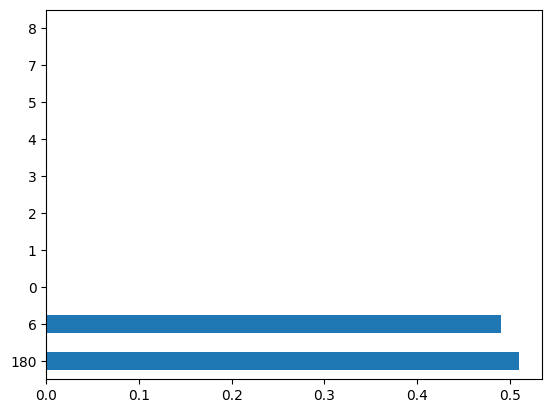

In [ ]:
# Decision Trees
from sklearn import tree
#choose from different tunable hyper parameters
clf = tree.DecisionTreeClassifier(max_depth=20,criterion='gini')

# Printing all the parameters of Decision Trees
print(clf)

# Creating the model on Training Data
DTree=clf.fit(X_train,y_train)
prediction=DTree.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DTree.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')


**AdaBoost**

In [ ]:
# Adaboost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Choosing Decision Tree with 1 level as the weak learner
DTC=DecisionTreeClassifier(max_depth=2)
clf = AdaBoostClassifier(n_estimators=20, base_estimator=DTC ,learning_rate=0.01)

# Printing all the parameters of Adaboost
print(clf)

# Creating the model on Training Data
AB=clf.fit(X_train,y_train)
prediction=AB.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=0.01, n_estimators=20)
              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00         1
     Neutral       0.00      0.00      0.00         1
    Positive       0.67      1.00      0.80         2

    accuracy                           0.75         4
   macro avg       0.56      0.67      0.60         4
weighted avg       0.58      0.75      0.65         4

[[1 0 0]
 [0 0 1]
 [0 0 2]]
Accuracy of the model on Testing Sample Data: 0.65


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no pred

In [79]:
# Generating the Logistic model on full data
# This is the best performing model
clf = LogisticRegression(C=10,penalty='l2', solver='newton-cg')
FinalModel=clf.fit(X,y)

In [82]:
# Defining a function which converts words into numeric vectors for prediction
from sklearn.preprocessing import StandardScaler

PredictorScalerFit = StandardScaler()

def FunctionPredictUrgency(inpText):

    # Generating the Glove word vector embeddings
    X=FunctionText2Vec(inpText)
    #print(X)

    # If standardization/normalization was done on training
    # then the above X must also be converted to same platform
    # Generating the normalized values of X
    X=PredictorScalerFit.transform(X)

    # Generating the prediction using Naive Bayes model and returning
    Prediction=FinalModel.predict(X)
    Result=pd.DataFrame(data=inpText, columns=['Text'])
    Result['Prediction']=Prediction
    return(Result)

In [86]:
# Calling the function
Reviews=["If you are kenyan and black, kindly stay away from this hotel. Suffice to stay, after a 3 day staycation I am not coming back. Don't get me wrong, the hotel has top notch service but the treatment by the staff terrible. Right from the reception you encounter rude, impressionable and impersonal staff. At the breakfast buffet two waiters were arguing rudely on whether to sit me inside or outside. I therefore had to stand for close to 5 minutes before being seated. Sometimes I would be left talking to myself as the waiters rushed to take orders from white and Indian customers. If your staff don't like blackKenyans, maybe you should have a sign referring the same. Your staff needs a whole seminar on customer care. This is the 21st century and not the 1900s. In the meantime let me take my money elsewhere",
         "I walked in was to meet a business colleague and have lunch! Walked in.. sat by the pool. 15mins in no one has come to ask on what I would like. 3 more clients walked in and waiters were pretty much tail gating them I’d say."
         ]
PredictorScalerFit.fit(X)
FunctionPredictUrgency(inpText=Reviews)

,Text,Prediction
0,"If you are kenyan and black, kindly stay away ...",Negative
1,I walked in was to meet a business colleague a...,Negative


**Question two**

**Td-Idf**


Collect four documents on social matter from Wikipedia and produce their Td-Idf score.
Expected.
a. The four documents
b. Their score

Social Matters 1

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TfidfVectorizer
vectorizer = TfidfVectorizer()

#path of the document we want to process
file_path = '/content/social_matters1'

# Read the content of the document
with open(file_path, 'r', encoding='utf-8') as file:
    document_content = file.read()

# Compute the TF-IDF matrix for the current document
X = vectorizer.fit_transform([document_content])

# Print the TF-IDF matrix
print(f"TF-IDF matrix for {file_path}:")
display(X.toarray())

# Get the feature names (words)
tfidf_tokens = vectorizer.get_feature_names_out()

# Print the feature names
print(f"Feature names for {file_path}:")
display(tfidf_tokens)



TF-IDF matrix for /content/social_matters1:


array([[0.00635488, 0.00635488, 0.00635488, 0.00635488, 0.00635488,
        0.00635488, 0.00635488, 0.01270975, 0.00635488, 0.01270975,
        0.00635488, 0.00635488, 0.00635488, 0.01270975, 0.00635488,
        0.00635488, 0.00635488, 0.01270975, 0.01270975, 0.00635488,
        0.00635488, 0.00635488, 0.00635488, 0.00635488, 0.01906463,
        0.01906463, 0.00635488, 0.00635488, 0.01270975, 0.00635488,
        0.00635488, 0.01270975, 0.01270975, 0.02541951, 0.01270975,
        0.01270975, 0.00635488, 0.00635488, 0.00635488, 0.00635488,
        0.00635488, 0.01270975, 0.00635488, 0.01270975, 0.00635488,
        0.00635488, 0.00635488, 0.00635488, 0.01270975, 0.00635488,
        0.01906463, 0.00635488, 0.01906463, 0.00635488, 0.01270975,
        0.01906463, 0.01270975, 0.00635488, 0.1652268 , 0.00635488,
        0.00635488, 0.00635488, 0.01270975, 0.05719389, 0.02541951,
        0.00635488, 0.08896828, 0.04448414, 0.00635488, 0.00635488,
        0.00635488, 0.00635488, 0.00635488, 0.00

Feature names for /content/social_matters1:


array(['10', '11', '12', '124', '13', '14', '15', '16', '17', '18', '180',
       '19', '1915', '1946', '1950', '1950s', '1953', '1954', '1957',
       '1961', '1966', '1969', '1976', '1978', '1980', '1988', '1999',
       '20', '2002', '2003', '2007', '2008', '2009', '2013', '2018',
       '2021', '31', '37', '42', '43', '45', '60', 'able', 'absolute',
       'achieved', 'actively', 'affair', 'affairs', 'after', 'again',
       'against', 'agree', 'all', 'alliance', 'also', 'although', 'among',
       'an', 'and', 'andreas', 'any', 'apart', 'are', 'as', 'at',
       'backlash', 'bavaria', 'bavarian', 'bayern', 'be', 'been',
       'before', 'behind', 'being', 'below', 'berlin', 'between', 'bhe',
       'both', 'bp', 'branches', 'building', 'bundesrat', 'bundestag',
       'but', 'bvp', 'by', 'cabinet', 'called', 'came', 'candidate',
       'candidates', 'career', 'casino', 'catholic', 'cdu', 'chairman',
       'chancellery', 'chancellor', 'christian', 'christlich',
       'circumstanc

Social Matters 2

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TfidfVectorizer
vectorizer = TfidfVectorizer()

#path of the document we want to process
file_path = '/content/socia_matters2'

# Read the content of the document
with open(file_path, 'r', encoding='utf-8') as file:
    document_content = file.read()

# Compute the TF-IDF matrix for the current document
X = vectorizer.fit_transform([document_content])

# Print the TF-IDF matrix
print(f"TF-IDF matrix for {file_path}:")
display(X.toarray())

# Get the feature names (words)
tfidf_tokens = vectorizer.get_feature_names_out()

# Print the feature names
print(f"Feature names for {file_path}:")
display(tfidf_tokens)



TF-IDF matrix for /content/socia_matters2:


array([[0.00364197, 0.00060699, 0.00060699, ..., 0.00242798, 0.00060699,
        0.00060699]])

Feature names for /content/socia_matters2:


array(['000', '024', '032', ..., 'zuckerberg', 'zuñiga', 'état'],
      dtype=object)

Social Matters 3

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TfidfVectorizer
vectorizer = TfidfVectorizer()

#path of the document we want to process
file_path = '/content/social_matters3'

# Read the content of the document
with open(file_path, 'r', encoding='utf-8') as file:
    document_content = file.read()

# Compute the TF-IDF matrix for the current document
X = vectorizer.fit_transform([document_content])

# Print the TF-IDF matrix
print(f"TF-IDF matrix for {file_path}:")
display(X.toarray())

# Get the feature names (words)
tfidf_tokens = vectorizer.get_feature_names_out()

# Print the feature names
print(f"Feature names for {file_path}:")
display(tfidf_tokens)



TF-IDF matrix for /content/social_matters3:


array([[0.00970051, 0.00970051, 0.00970051, 0.00970051, 0.00970051,
        0.00970051, 0.02910154, 0.00970051, 0.01940102, 0.01940102,
        0.02910154, 0.00970051, 0.00970051, 0.00970051, 0.00970051,
        0.00970051, 0.00970051, 0.00970051, 0.00970051, 0.00970051,
        0.02910154, 0.00970051, 0.00970051, 0.00970051, 0.00970051,
        0.01940102, 0.00970051, 0.00970051, 0.00970051, 0.00970051,
        0.02910154, 0.00970051, 0.00970051, 0.06790358, 0.00970051,
        0.28131485, 0.00970051, 0.01940102, 0.00970051, 0.01940102,
        0.00970051, 0.00970051, 0.00970051, 0.02910154, 0.01940102,
        0.01940102, 0.01940102, 0.00970051, 0.09700512, 0.01940102,
        0.00970051, 0.00970051, 0.01940102, 0.02910154, 0.00970051,
        0.01940102, 0.00970051, 0.00970051, 0.00970051, 0.00970051,
        0.00970051, 0.01940102, 0.05820307, 0.00970051, 0.00970051,
        0.02910154, 0.02910154, 0.00970051, 0.01940102, 0.00970051,
        0.00970051, 0.00970051, 0.01940102, 0.00

Feature names for /content/social_matters3:


array(['10', '11', '12', '13', '14', '15', '2021', '2022', '21',
       'ability', 'about', 'academics', 'accessible', 'accessibly',
       'accommodating', 'account', 'accurately', 'acknowledged',
       'address', 'admire', 'advance', 'against', 'age', 'agenda',
       'aggressive', 'aims', 'all', 'allow', 'allows', 'almost', 'also',
       'ambition', 'american', 'an', 'ancestry', 'and', 'angeles',
       'another', 'anti', 'any', 'appeal', 'applied', 'april', 'are',
       'argued', 'argues', 'arguing', 'art', 'as', 'association',
       'assuage', 'astonishingly', 'at', 'attainment', 'austin',
       'authors', 'avoid', 'aylwyn', 'background', 'bait', 'based',
       'basis', 'be', 'because', 'been', 'behavior', 'behavioral',
       'belief', 'believe', 'beneficial', 'benefit', 'best', 'better',
       'between', 'beyond', 'biological', 'biology', 'blinkered',
       'boiling', 'book', 'books', 'breeding', 'bryan', 'but', 'by',
       'cambridge', 'can', 'case', 'cautioning', 'cen

Social Matters 4

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TfidfVectorizer
vectorizer = TfidfVectorizer()

#path of the document we want to process
file_path = '/content/social_matters4'

# Read the content of the document
with open(file_path, 'r', encoding='utf-8') as file:
    document_content = file.read()

# Compute the TF-IDF matrix for the current document
X = vectorizer.fit_transform([document_content])

# Print the TF-IDF matrix
print(f"TF-IDF matrix for {file_path}:")
display(X.toarray())

# Get the feature names (words)
tfidf_tokens = vectorizer.get_feature_names_out()

# Print the feature names
print(f"Feature names for {file_path}:")
display(tfidf_tokens)



TF-IDF matrix for /content/social_matters4:


array([[0.01434127, 0.00478042, 0.00478042, 0.00478042, 0.00478042,
        0.00478042, 0.00956085, 0.00478042, 0.00478042, 0.00478042,
        0.00478042, 0.00478042, 0.00478042, 0.01434127, 0.00478042,
        0.00478042, 0.00478042, 0.00478042, 0.00478042, 0.00478042,
        0.00478042, 0.00478042, 0.00478042, 0.00956085, 0.00478042,
        0.00478042, 0.00478042, 0.00956085, 0.00478042, 0.00478042,
        0.00478042, 0.00478042, 0.00478042, 0.00478042, 0.00478042,
        0.00478042, 0.00956085, 0.00478042, 0.00956085, 0.00478042,
        0.00478042, 0.01434127, 0.00478042, 0.00478042, 0.00956085,
        0.01434127, 0.00478042, 0.00956085, 0.00478042, 0.00478042,
        0.00956085, 0.01434127, 0.00478042, 0.01912169, 0.00478042,
        0.00478042, 0.02390211, 0.00478042, 0.01434127, 0.01912169,
        0.00478042, 0.0621455 , 0.00478042, 0.36331213, 0.01434127,
        0.00478042, 0.00956085, 0.08604761, 0.00478042, 0.00478042,
        0.00956085, 0.00478042, 0.00478042, 0.00

Feature names for /content/social_matters4:


array(['10', '11', '12', '13', '14', '15', '16', '17', '1750', '18', '19',
       '1900', '20', '2000', '2003', '2008', '2009', '2010', '2017',
       '2018', '21', '22', '23', '24', '25', '26', '27', '28', '29', '34',
       '42', '49', '50', '65', '70', '79', 'aarp', 'able', 'aboriginal',
       'aborigines', 'abuse', 'according', 'act', 'acts', 'addition',
       'adult', 'adults', 'advantages', 'advisory', 'africans', 'after',
       'age', 'aids', 'all', 'allow', 'allows', 'also', 'america',
       'american', 'americans', 'among', 'an', 'analysis', 'and',
       'another', 'any', 'approximately', 'are', 'area', 'arise',
       'around', 'arrangement', 'arrival', 'article', 'as', 'asia',
       'asian', 'asians', 'associated', 'at', 'attributed', 'aunts',
       'australian', 'author', 'authority', 'available', 'average',
       'background', 'based', 'basic', 'be', 'because', 'become',
       'becomes', 'bedrooms', 'been', 'before', 'begin', 'beginning',
       'behalf', 'behavio

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TfidfVectorizer
vectorizer = TfidfVectorizer()

# List to store DataFrame for each document
results = []

# File paths to our social matters documents
file_paths = [
    '/content/social_matters1',
    '/content/socia_matters2',
    '/content/social_matters3',
    '/content/social_matters4'
]

# Iterate over each document
for file_path in file_paths:
    # Read the content of the current document
    with open(file_path, 'r', encoding='utf-8') as file:
        document_content = file.read()

    # Compute the TF-IDF matrix for the current document
    X = vectorizer.fit_transform([document_content])

    # Get the feature names (words)
    tfidf_tokens = vectorizer.get_feature_names_out()

    # Convert the TF-IDF matrix to arrays
    tfidf_arrays = X.toarray()

    # Create the DataFrame for the current document
    result = pd.DataFrame(
        data=tfidf_arrays,
        index=[file_path],
        columns=tfidf_tokens
    )

    # Append the DataFrame to the results list
    results.append(result)

# Concatenate all DataFrames into one
final_result = pd.concat(results)

# Display the final DataFrame
final_result


,10,11,12,124,13,14,15,16,17,18,...,unit,units,unmarried,vp,waited,walking,whites,wields,wives,working
/content/social_matters1,0.006355,0.006355,0.006355,0.006355,0.006355,0.006355,0.006355,0.012710,0.006355,0.01271,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
/content/socia_matters2,0.004856,0.004249,0.005463,0.000607,0.006677,0.003035,0.002428,0.004249,0.004249,0.00607,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
/content/social_matters3,0.009701,0.009701,0.009701,NaN,0.009701,0.009701,0.009701,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
/content/social_matters4,0.014341,0.004780,0.004780,NaN,0.004780,0.004780,0.004780,0.009561,0.004780,0.00478,...,0.019122,0.00478,0.009561,0.00478,0.00478,0.00478,0.009561,0.00478,0.00478,0.00478
